In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('Hitters.csv')

In [46]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [17]:
df.isna().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [54]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [55]:
dummies = pd.get_dummies(df[['League','Division','NewLeague']])

In [56]:
dummies = dummies.astype(int)

In [57]:
y = df['Salary']

In [58]:
df.drop(['League','Division','NewLeague','Salary'],axis=1, inplace=True)

In [59]:
X = pd.concat([df, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AtBat        322 non-null    int64
 1   Hits         322 non-null    int64
 2   HmRun        322 non-null    int64
 3   Runs         322 non-null    int64
 4   RBI          322 non-null    int64
 5   Walks        322 non-null    int64
 6   Years        322 non-null    int64
 7   CAtBat       322 non-null    int64
 8   CHits        322 non-null    int64
 9   CHmRun       322 non-null    int64
 10  CRuns        322 non-null    int64
 11  CRBI         322 non-null    int64
 12  CWalks       322 non-null    int64
 13  PutOuts      322 non-null    int64
 14  Assists      322 non-null    int64
 15  Errors       322 non-null    int64
 16  League_N     322 non-null    int32
 17  Division_W   322 non-null    int32
 18  NewLeague_N  322 non-null    int32
dtypes: int32(3), int64(16)
memory usage: 44.2 KB


In [60]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,0,0,0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [42]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
168,315,73,5,23,37,16,4,450,108,6,38,46,28,227,15,3,110.0,0,1,0
148,497,136,7,58,38,26,11,3871,1066,40,450,367,241,304,347,10,850.0,0,0,0
221,576,167,8,89,49,57,4,822,232,19,132,83,79,325,12,8,210.0,1,0,1
227,572,152,18,105,49,65,2,978,249,36,168,91,101,325,13,3,200.0,0,1,0
139,438,103,2,65,32,71,2,440,103,2,67,32,71,276,7,9,100.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,279,64,0,31,26,30,1,279,64,0,31,26,30,107,205,16,75.0,1,1,1
71,138,31,8,18,21,38,3,244,53,12,33,32,55,244,21,4,NaN,1,0,1
106,420,95,23,55,58,37,3,646,139,31,77,77,61,206,10,7,NaN,1,1,1
270,303,84,4,35,32,23,2,312,87,4,39,32,23,179,5,3,NaN,1,1,1


In [62]:
median_salary = y_train.median(skipna=True)
y_train = y_train.fillna(median_salary)
y_test = y_test.fillna(median_salary)

In [63]:
lasso_model = Lasso(alpha=1, max_iter=10000).fit(X_train, y_train)

In [65]:
lasso_model.intercept_

342.4749627068721

In [66]:
lasso_model.coef_

array([-1.99925985e+00,  5.56375443e+00,  4.83080022e+00,  6.92160579e-02,
       -8.14901146e-01,  4.89549676e+00, -1.02288515e+01, -2.13856519e-01,
        5.94469005e-01, -1.11556817e-02,  8.82991593e-01,  7.91060063e-01,
       -8.19161381e-01,  1.83643813e-01,  4.03583190e-01, -4.06562679e+00,
        2.69468875e+01, -1.11701162e+02, -0.00000000e+00])

In [67]:
# Training data
pred_train = lasso_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train)*100,2))
print("---------------------------")
# Test data
pred_test = lasso_model.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test)*100,2))

MSE training set 83881.09
R squared training set 47.56
---------------------------
MSE test set 119467.86
R squared test set 36.61


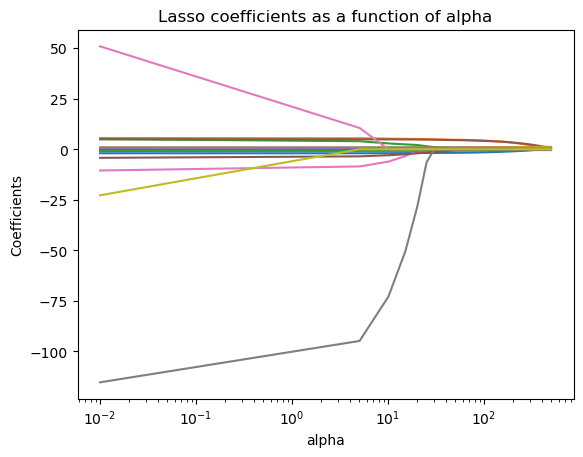

In [68]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [115]:
# Create and fit the LassoCV model to the training data with cross-validation
# Lasso with 10 fold cross-validation
lasso_cv_model = LassoCV(alphas = np.random.randint(1, 1000, 100), cv =10, max_iter=100000, n_jobs=-1,random_state=42).fit(X_train, y_train)

14

In [118]:
lasso_cv_model.alpha_

14

In [122]:
lasso_tuned =Lasso(alpha=lasso_cv_model.alpha_, max_iter=10000).fit(X_train, y_train)

In [123]:
# Training data
pred_train_tuned = lasso_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train_tuned)
print('MSE training set post tuning', round(mse_train, 2))
print('R squared training set post tuning', round(r2_score(y_train, pred_train_tuned)*100,2))
print("---------------------------")
# Test data
pred_test_tuned = lasso_tuned.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test_tuned)
print('MSE test set post tuning', round(mse_test, 2))
print('R squared test set post tuning', round(r2_score(y_test, pred_test_tuned)*100,2))


MSE training set post tuning 85128.5
R squared training set post tuning 46.78
---------------------------
MSE test set post tuning 120226.55
R squared test set post tuning 36.21


In [124]:
# Create a Pandas Series of the coefficients from the tuned Lasso regression model
pd.Series(lasso_tuned.coef_, index=X_train.columns)

AtBat          -1.926387
Hits            5.162895
HmRun           2.471877
Runs            0.273873
RBI            -0.000000
Walks           4.840163
Years          -4.048124
CAtBat         -0.260548
CHits           0.720738
CHmRun          0.114458
CRuns           0.870988
CRBI            0.741287
CWalks         -0.790107
PutOuts         0.178006
Assists         0.381764
Errors         -2.596440
League_N        0.000000
Division_W    -55.644837
NewLeague_N     0.000000
dtype: float64